<a href="https://colab.research.google.com/github/ProgrammingWithVinay/Sarcasm-Detection/blob/main/project_1_sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import preprocessing
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
import string

# About Data

In [ ]:
# load data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS Projects/Copy of Data.csv")

In [ ]:
data.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


In [ ]:
data.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
freq,1,6531


In [ ]:
data['target'].value_counts()

Non Sarcastic    6531
Sarcastic        5975
Name: target, dtype: int64

In [ ]:
data.isnull().sum()

headlines    0
target       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['target']= label_encoder.fit_transform(data['target'])
data.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,0
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",1
2,New Emails Reveal Warm Relationship Between Ka...,0
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,0
4,God Urges Rick Perry Not To Run For President,1


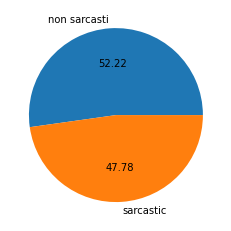

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['non sarcasti','sarcastic'],autopct="%0.2f")
plt.show()

# Preprocessing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    a=[]
    for i in text:
        if i.isalnum():
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))
        
    return " ".join(a)

In [ ]:
data['headlines']=data['headlines'].apply(transform_text)


In [ ]:
data.head()

,headlines,target
0,cnn triumph least demograph categori,0
1,best could say iron man action figur voic desp...,1
2,new email reveal warm relationship kamala harr...,0
3,donald trump get slam racist birther bot attac...,0
4,god urg rick perri run presid,1


In [ ]:
df=data.copy()
df.head()

,headlines,target
0,cnn triumph least demograph categori,0
1,best could say iron man action figur voic desp...,1
2,new email reveal warm relationship kamala harr...,0
3,donald trump get slam racist birther bot attac...,0
4,god urg rick perri run presid,1


In [ ]:
from wordcloud import WordCloud

Most used words in sarcasm messages


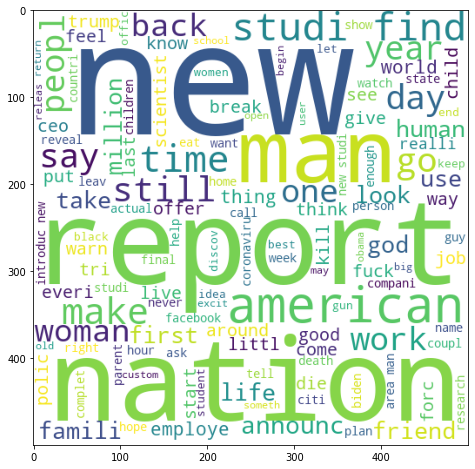

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
sarcastic_wc=wc.generate(data[data['target']==1]['headlines'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(sarcastic_wc)
print("Most used words in sarcasm messages")

Most used words in non sarcastic messages


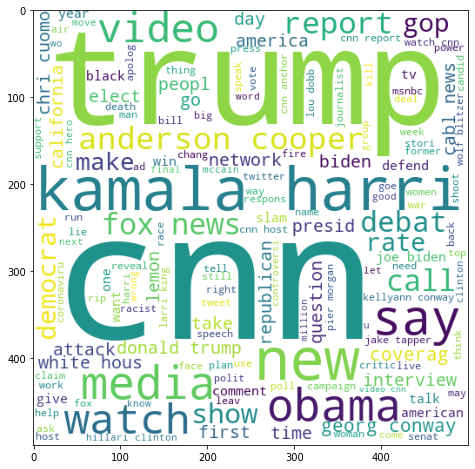

In [ ]:
non_sarcastic_wc=wc.generate(data[data['target']==0]['headlines'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(non_sarcastic_wc)
print("Most used words in non sarcastic messages")

# Universal Sentence Embedding

In [ ]:
headlines = data["headlines"].tolist()

model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = model(headlines)

embeddings[:2]

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.01247043, -0.0449777 , -0.05727013, ..., -0.00098373,
        -0.07869481, -0.04850937],
       [-0.05154784, -0.07293208, -0.01368856, ...,  0.01716093,
         0.06108485, -0.0222715 ]], dtype=float32)>

In [ ]:
data.head()

,headlines,target
0,cnn triumph least demograph categori,0
1,best could say iron man action figur voic desp...,1
2,new email reveal warm relationship kamala harr...,0
3,donald trump get slam racist birther bot attac...,0
4,god urg rick perri run presid,1


In [ ]:
X = embeddings
y = data["target"].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
knc = KNeighborsClassifier()

knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy  - ",accuracy)
print("Precision - ",precision)
print('Recall    - ',recall)
print('F1 Score  - ',f1)

Accuracy  -  0.842925659472422
Precision -  0.8524150268336315
Recall    -  0.8069432684165961
F1 Score  -  0.8290561113527621


## **Hyperparameter tuning**

 **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
li=[1,5,10,15,20,25,30]

In [ ]:
param_grid = {'n_neighbors':li, 'weights': ['uniform','distance']}
grid_search = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 8, 'weights': 'distance'}
Best score:  0.8430344888423529


# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {'n_neighbors': np.arange(1, 31), 'weights': ['uniform', 'distance']}
rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
rand_search.fit(X, y)

In [ ]:
print("Best parameters: ", rand_search.best_params_)
print("Best score: ", rand_search.best_score_)

# Machine learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
#mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
#xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    #'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    #'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy,precision,recall,f1

In [ ]:
accuracy_scores = []
precision_scores = []
recall=[]
f1_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\n\nFor ",name)
    print("Accuracy  - ",current_accuracy)
    print("Precision - ",current_precision)
    print('Recall    - ',current_recall)
    print('F1 Score  - ',current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall.append(current_recall)
    f1_scores.append(current_f1)



For  SVC
Accuracy  -  0.8141486810551559
Precision -  0.7896440129449838
Recall    -  0.8264182895850973
F1 Score  -  0.8076127430699214


For  KN
Accuracy  -  0.842925659472422
Precision -  0.8524150268336315
Recall    -  0.8069432684165961
F1 Score  -  0.8290561113527621


For  DT
Accuracy  -  0.7649880095923262
Precision -  0.7251328777524677
Recall    -  0.8086367485182049
F1 Score  -  0.764611689351481


For  LR
Accuracy  -  0.8309352517985612
Precision -  0.8111658456486043
Recall    -  0.8365791701947503
F1 Score  -  0.8236765318882868


For  RF
Accuracy  -  0.815347721822542
Precision -  0.7668893838158871
Recall    -  0.8746824724809483
F1 Score  -  0.8172468354430378


For  AdaBoost
Accuracy  -  0.8009592326139089
Precision -  0.7852965747702589
Recall    -  0.7959356477561389
F1 Score  -  0.7905803195962995


For  BgC
Accuracy  -  0.82414068745004
Precision -  0.802943581357318
Recall    -  0.8314987298899238
F1 Score  -  0.8169717138103162


For  ETC
Accuracy  -  0.806954

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall,'F1_score':f1_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
1,KN,0.842926,0.852415,0.806943,0.829056
3,LR,0.830935,0.811166,0.836579,0.823677
6,BgC,0.824141,0.802944,0.831499,0.816972
8,GBDT,0.819744,0.791069,0.839966,0.814784
0,SVC,0.814149,0.789644,0.826418,0.807613
5,AdaBoost,0.800959,0.785297,0.795936,0.790580
4,RF,0.815348,0.766889,0.874682,0.817247
7,ETC,0.806954,0.752168,0.881456,0.811696
2,DT,0.764988,0.725133,0.808637,0.764612


# TF-IDF


In [ ]:
df.head()

,headlines,target
0,cnn triumph least demograph categori,0
1,best could say iron man action figur voic desp...,1
2,new email reveal warm relationship kamala harr...,0
3,donald trump get slam racist birther bot attac...,0
4,god urg rick perri run presid,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(df['headlines'])


In [ ]:
print(result.shape)
result[1].getnnz()

(12506, 11585)


14

In [ ]:
X = result
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
accuracy_scores = []
precision_scores = []
recall=[]
f1_scores=[]

print("******** Using TF-IDF ********")

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\n\nFor ",name)
    print("Accuracy  - ",current_accuracy)
    print("Precision - ",current_precision)
    print('Recall    - ',current_recall)
    print('F1 Score  - ',current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall.append(current_recall)
    f1_scores.append(current_f1)

******** Using TF-IDF ********


For  SVC
Accuracy  -  0.8593125499600319
Precision -  0.8205723124516628
Recall    -  0.8983911939034717
F1 Score  -  0.8577202910266775


For  KN
Accuracy  -  0.5287769784172662
Precision -  1.0
Recall    -  0.001693480101608806
F1 Score  -  0.0033812341504649195


For  DT
Accuracy  -  0.6738609112709832
Precision -  0.5936377629553617
Recall    -  0.9796782387806944
F1 Score  -  0.739297124600639


For  LR
Accuracy  -  0.8217426059152678
Precision -  0.7571728481455563
Recall    -  0.9161727349703641
F1 Score  -  0.8291187739463601


For  RF
Accuracy  -  0.8425259792166268
Precision -  0.852914798206278
Recall    -  0.8052497883149873
F1 Score  -  0.8283972125435539


For  AdaBoost
Accuracy  -  0.7657873701039168
Precision -  0.6810712111990261
Recall    -  0.947502116850127
F1 Score  -  0.7924929178470255


For  BgC
Accuracy  -  0.8225419664268585
Precision -  0.8346957311534968
Recall    -  0.7781541066892464
F1 Score  -  0.8054338299737073


For  E

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall,'F1_score':f1_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision,Recall,F1_score
1,KN,0.528777,1.000000,0.001693,0.003381
7,ETC,0.856115,0.870153,0.817104,0.842795
4,RF,0.842526,0.852915,0.805250,0.828397
6,BgC,0.822542,0.834696,0.778154,0.805434
0,SVC,0.859313,0.820572,0.898391,0.857720
3,LR,0.821743,0.757173,0.916173,0.829119
5,AdaBoost,0.765787,0.681071,0.947502,0.792493
8,GBDT,0.735811,0.649770,0.955123,0.773397
2,DT,0.673861,0.593638,0.979678,0.739297


In [ ]:
param_grid = {'C': [10], 'kernel': ['rbf']}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(gamma=1.0, kernel='sigmoid'),
             param_grid={'C': [10], 'kernel': ['rbf']})

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 10, 'kernel': 'rbf'}
Best score:  0.8765500749625186
